# README

pip install --upgrade "ibm-watson>=4.0.1"

Go to https://cloud.ibm.com/docs/visual-recognition/object-detection.html?programming_language=python

Go to the Visual Recognition page in the catalog.

Sign up for a free IBM Cloud account or log in.

Click Create.

Copy the credentials to authenticate to your service instance:

On the Manage page, click Show Credentials.

Copy the API Key and URL values.

### API and URL 

{
  "apikey": "aNi8EgeCBuHytIz_1lsAV0AdlhZl0sheqMU0OlcC4oWN",
  "iam_apikey_description": "Auto-generated for key f2576f1b-05af-46c8-872b-fed9facddcfc",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/615b78840d7d4ab6bb57168427e66a18::serviceid:ServiceId-39fff9dc-21b4-4a44-a0ee-c9861e295f37",
  "url": "https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/91187b85-5c16-4256-9fd8-968ccb873dea"
}

Default IBM watson classifer is the general classifer given by IBM itself. Although it can recognize many different objects but the confidence value is lower as compared to a custom classifer such as food(which is also from IBM)

Do not run all cells at once. Go by the order of:
Creating

Checking

Testing

And deleting if required as lite account only allow one classifier

## Documentation:

Classifying an image:
https://cloud.ibm.com/docs/visual-recognition/object-detection.html?programming_language=python

Creting a custom classifier
https://cloud.ibm.com/apidocs/visual-recognition/visual-recognition-v3?code=python#delete-a-classifier

## Default IBM watson classifier 

In [ ]:
import json
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('UuGb2hMnp2Yw5MNcpcxSGasbrJLslQdknhwjSPzDZKCZ')
visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    authenticator=authenticator
)

visual_recognition.set_service_url('https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/91187b85-5c16-4256-9fd8-968ccb873dea')

url = 'https://media.gettyimages.com/photos/view-of-midmorning-freeway-traffic-along-the-san-diego-freeway-the-picture-id1213776495?s=2048x2048'

classes_result = visual_recognition.classify(url=url).get_result()
print(json.dumps(classes_result, indent=2))


# Food classifier

In [ ]:
import json
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('UuGb2hMnp2Yw5MNcpcxSGasbrJLslQdknhwjSPzDZKCZ')
visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    authenticator=authenticator
)

visual_recognition.set_service_url('https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/91187b85-5c16-4256-9fd8-968ccb873dea')

url = 'http://upload.evocdn.co.uk/fruitnet/uploads/asset_image/2_1212685_e.jpg'
classifier_ids = ["food"]

classes_result = visual_recognition.classify(url=url, classifier_ids=classifier_ids).get_result()
print(json.dumps(classes_result, indent=2))

# Creating custom classifier

In [ ]:
import json
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('UuGb2hMnp2Yw5MNcpcxSGasbrJLslQdknhwjSPzDZKCZ')
visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    authenticator=authenticator
)

visual_recognition.set_service_url('https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/91187b85-5c16-4256-9fd8-968ccb873dea')

with open('./cars.zip', 'rb') as cars, open(
        './empty_roads.zip', 'rb') as empty_roads, open(
            './buildings.zip', 'rb') as buildings:
    model = visual_recognition.create_classifier(
        'Car',
        positive_examples={'cars': cars, 'empty_roads': empty_roads},
        negative_examples=buildings).get_result()
print(json.dumps(model, indent=2))

# Checking classifiers

In [ ]:
import json
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('aNi8EgeCBuHytIz_1lsAV0AdlhZl0sheqMU0OlcC4oWN')
visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    authenticator=authenticator
)

visual_recognition.set_service_url('https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/91187b85-5c16-4256-9fd8-968ccb873dea')

classifiers = visual_recognition.list_classifiers(verbose=True).get_result()
print(json.dumps(classifiers, indent=2))

# Delete classifier

In [ ]:
import json
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('aNi8EgeCBuHytIz_1lsAV0AdlhZl0sheqMU0OlcC4oWN')
visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    authenticator=authenticator
)

visual_recognition.set_service_url('https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/91187b85-5c16-4256-9fd8-968ccb873dea')

visual_recognition.delete_classifier('Car_1641645348')

# Testing classifier

In [ ]:
import json
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('aNi8EgeCBuHytIz_1lsAV0AdlhZl0sheqMU0OlcC4oWN')
visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    authenticator=authenticator
)

visual_recognition.set_service_url('https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/91187b85-5c16-4256-9fd8-968ccb873dea')

url = 'https://www.mytransport.sg/trafficsmart/images/6708_1410_20200614141206_a00fa5.jpg'
classifier_ids='Car_1729701386'


classes_result = visual_recognition.classify(url=url, classifier_ids=classifier_ids, threshold=0.0).get_result()
print(json.dumps(classes_result, indent=2))

# Libraries and function with URL input

In [ ]:
from IPython.display import Image, display
from ipywidgets import Image
import requests
import json
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

################################# AUTHENTICATION #####################################
authenticator = IAMAuthenticator('aNi8EgeCBuHytIz_1lsAV0AdlhZl0sheqMU0OlcC4oWN')
visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    authenticator=authenticator
)
visual_recognition.set_service_url('https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/91187b85-5c16-4256-9fd8-968ccb873dea')
classifier_ids='Car_1729701386'
########################################################################################

def car_or_empty_road_urlinput():
    url = input("Enter url of image : ") 
    display(Image(value=requests.get(url).content, width=500))
    classes_result = visual_recognition.classify(url=url, classifier_ids=classifier_ids, threshold=0.0).get_result()
    #print(json.dumps(classes_result, indent=2))
    for x in (classes_result['images'][0]['classifiers'][0]["classes"]):
        if (x['class'] == 'cars') and (x['score'] >= 0.50):
            print(x['class'] +': ' + str(x['score']))
            return True
            break
        else:
            print(x['class'] +': ' + str(x['score']))
            return False
            break


In [ ]:
while True:
    car_or_empty_road()

# Libraries and function with file input

In [1]:
from IPython.display import Image, display
from ipywidgets import Image
import requests
import json
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

################################# AUTHENTICATION #####################################
authenticator = IAMAuthenticator('aNi8EgeCBuHytIz_1lsAV0AdlhZl0sheqMU0OlcC4oWN')
visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    authenticator=authenticator
)
visual_recognition.set_service_url('https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/91187b85-5c16-4256-9fd8-968ccb873dea')
classifier_ids='Car_1729701386'
########################################################################################

def car_or_empty_road_fileinput():
    url = input("Enter url of image (eg: ./caraccident.jpg): ")
    img=mpimg.imread(url)
    imgplot = plt.imshow(img)

    with open(url, 'rb') as images_file: #'./fruitbowl.jpg'
        classes_result = visual_recognition.classify(images_file=images_file, classifier_ids=classifier_ids, threshold=0.0).get_result()
        #print(json.dumps(classes_result, indent=2))
        for x in (classes_result['images'][0]['classifiers'][0]["classes"]):
            if (x['class'] == 'cars') and (x['score'] >= 0.50):
                print(x['class'] +': ' + str(x['score']))
                return True
                break
            else:
                print(x['class'] +': ' + str(x['score']))
                return False
                break

Enter url of image (eg: ./caraccident.jpg): ./caraccident.jpg
cars: 0.807


True

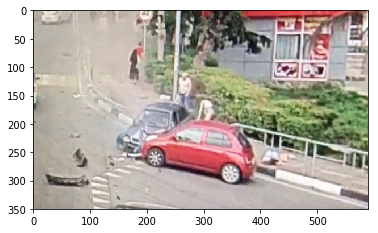

In [2]:
car_or_empty_road_fileinput()